In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load dataset
df = pd.read_csv('energy_efficiency_data.csv')

In [ ]:
# Let view the first five rows of our data
df.head()

NameError: ignored

In [ ]:
# Split dataset into features and target variables
X = df.iloc[:, :-2]
y = df.iloc[:, -2:]

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define models
models = [LinearRegression(), DecisionTreeRegressor(random_state=42), RandomForestRegressor(random_state=42)]

In [ ]:
# Train and evaluate models
for model in models:
   # Train model
   model.fit(X_train, y_train)
   # Make predictions for heating load and cooling load
   pred_heat = model.predict(X_test)[:, 0]
   pred_cool = model.predict(X_test)[:, 1]
   # Evaluate model using mean absolute error, mean squared error, and R-squared
   mae_heat = mean_absolute_error(y_test.iloc[:, 0], pred_heat)
   mae_cool = mean_absolute_error(y_test.iloc[:, 1], pred_cool)

   mse_heat = mean_squared_error(y_test.iloc[:, 0], pred_heat)
   mse_cool = mean_squared_error(y_test.iloc[:, 1], pred_cool)

   r2_heat = r2_score(y_test.iloc[:, 0], pred_heat)
   r2_cool = r2_score(y_test.iloc[:, 1], pred_cool)


    # Print evaluation metrics for heating load and cooling load
   print(type(model).__name__)
   print("Heating Load:")
   print("Mean Absolute Error:", mae_heat)
   print("Mean Squared Error:", mse_heat)
   print("R-squared:", r2_heat)
   print("\nCooling Load:")
   print("Mean Absolute Error:", mae_cool)
   print("Mean Squared Error:", mse_cool)
   print("R-squared:", r2_cool)
   print("\n")

LinearRegression
Heating Load:
Mean Absolute Error: 2.179837947968977
Mean Squared Error: 9.135990218657705
R-squared: 0.9123490896941121

Cooling Load:
Mean Absolute Error: 2.194652394329684
Mean Squared Error: 9.888426520486595
R-squared: 0.893279501354542


DecisionTreeRegressor
Heating Load:
Mean Absolute Error: 0.39980519480519505
Mean Squared Error: 0.3543967532467535
R-squared: 0.9965999090095247

Cooling Load:
Mean Absolute Error: 1.2725324675324676
Mean Squared Error: 5.3833344155844145
R-squared: 0.9419005509100802


RandomForestRegressor
Heating Load:
Mean Absolute Error: 0.3470246753246743
Mean Squared Error: 0.24662895376623145
R-squared: 0.9976338358745994

Cooling Load:
Mean Absolute Error: 1.1661720779220794
Mean Squared Error: 3.6345879335714324
R-squared: 0.9607738363795395




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load dataset
data = pd.read_csv('energy_efficiency_data.csv')

In [ ]:
# Split the data into training and testing sets
train = data.sample(frac=0.8, random_state=42)
test = data.drop(train.index)


In [ ]:
# Define the features and target variables
features = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']
target = ['Heating_Load', 'Cooling_Load']


In [ ]:
# Initialize the models
models = {'Linear Regression': LinearRegression(),
          'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
          'Random Forest Regressor': RandomForestRegressor(random_state=42)}

In [ ]:
# Train and evaluate the models
results = []
for target_var in target:
  for name, model in models.items():
    X_train = train[features]
    y_train = train[target_var]
    X_test = test[features]
    y_test = test[target_var]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': name, 'Target': target_var, 'MAE': mae, 'MSE': mse, 'R-squared': r2})


In [ ]:
# Convert results to a pandas DataFrame
results_df = pd.DataFrame(results)

In [ ]:
# Create a table of the results
table = pd.pivot_table(results_df, index='Model', columns='Target', values=['MAE', 'MSE', 'R-squared'])

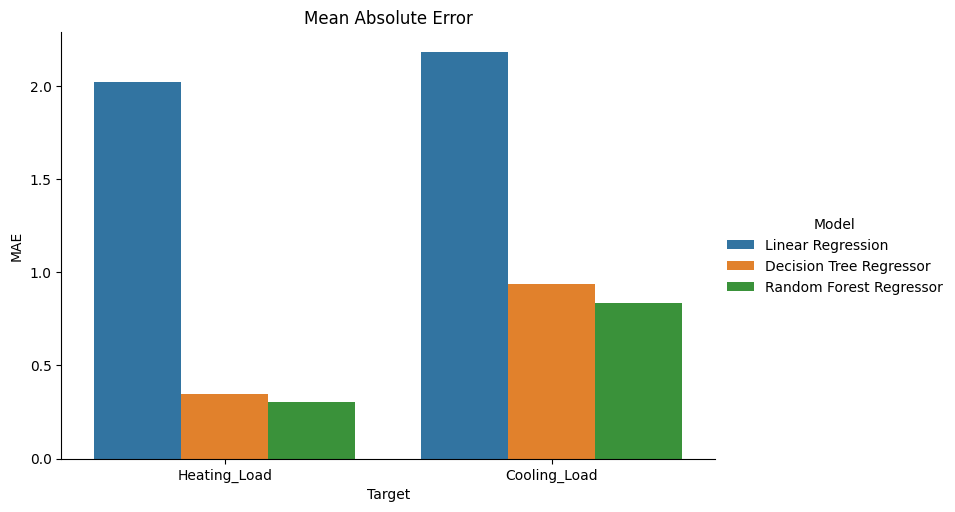

In [ ]:
# Create a bar plot of the MAE for each model and target variable
sns.catplot(x='Target', y='MAE', hue='Model', data=results_df, kind='bar', height=5, aspect=1.5)
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.show()

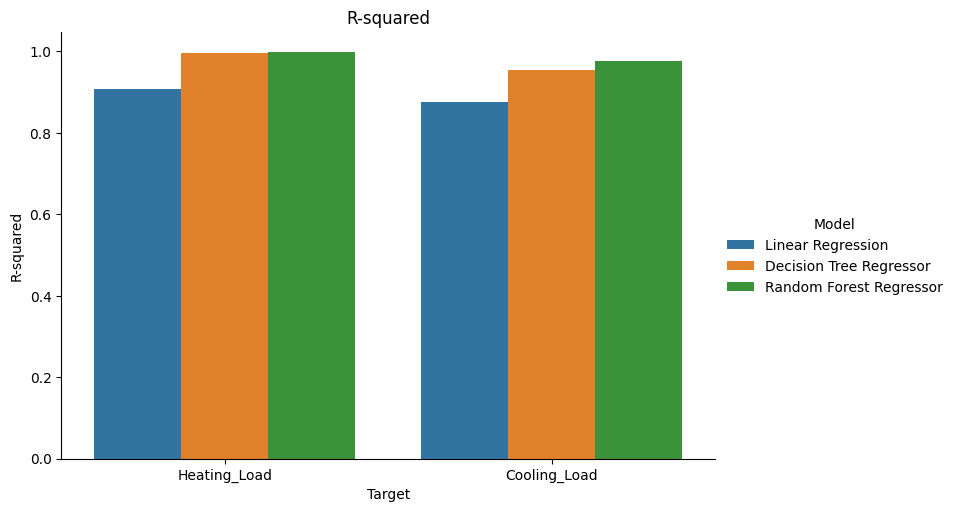

In [ ]:
# Create a bar plot of the R-squared for each model and target variable
sns.catplot(x='Target', y='R-squared', hue='Model', data=results_df, kind='bar', height=5, aspect=1.5)
plt.title('R-squared')
plt.ylabel('R-squared')
plt.show()

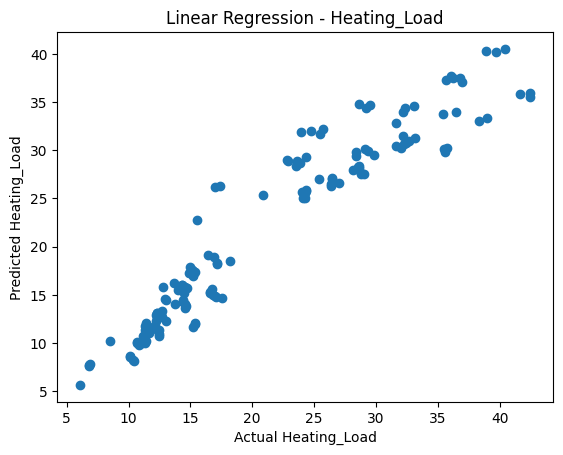

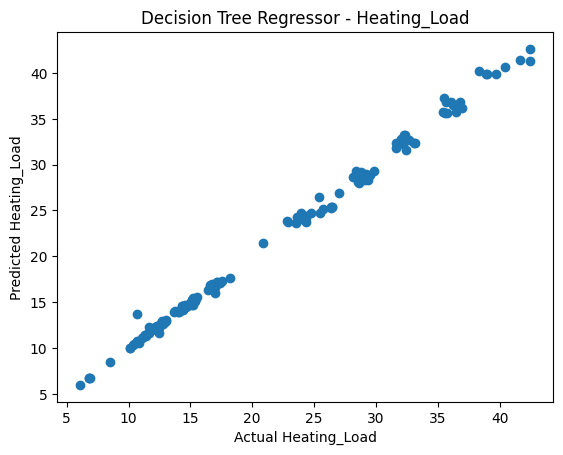

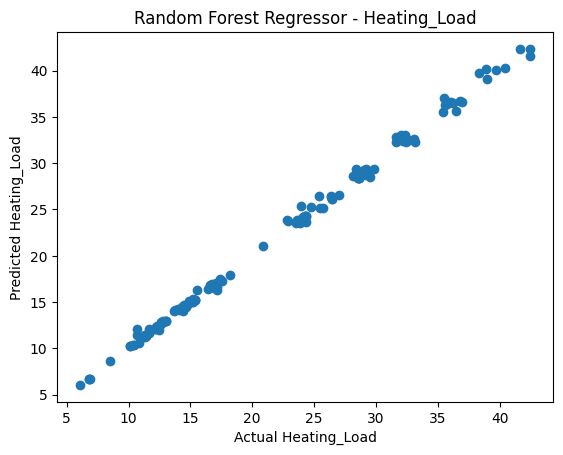

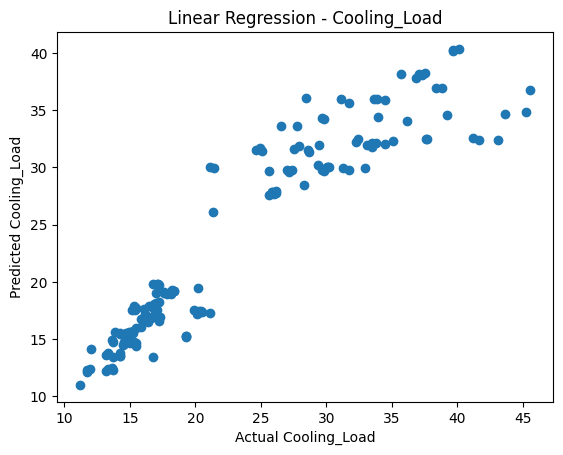

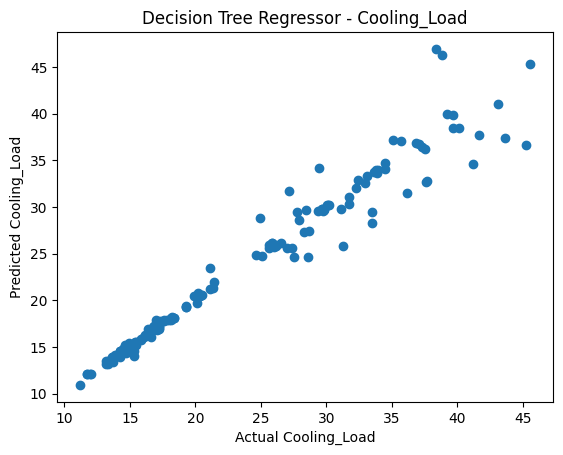

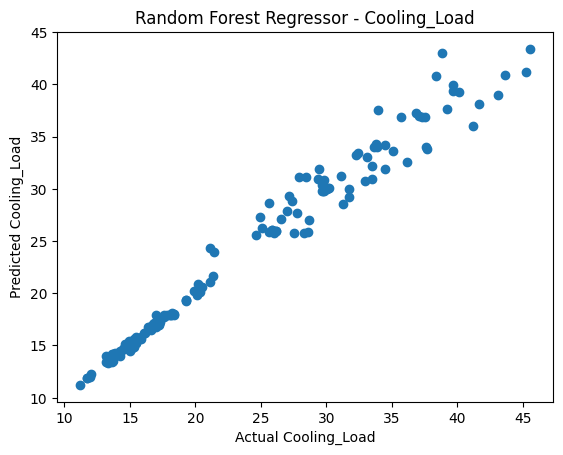

In [ ]:
# Create a scatter plot of the actual vs. predicted values for each target variable and model
for target_var in target:
  for name, model in models.items():
    X_train = train[features]
    y_train = train[target_var]
    X_test = test[features]
    y_test = test[target_var]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual ' + target_var)
    plt.ylabel('Predicted ' + target_var)
    plt.title(name + ' - ' + target_var)
    plt.show()